In [1]:
# Suppress Warning
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import matplotlib.mlab as mlab
import seaborn as sns

#Importing the dataset and dropping the unwanted columns 
dia_df=pd.read_csv("./diabetes2.csv")
dia_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
dia_df.shape

(768, 9)

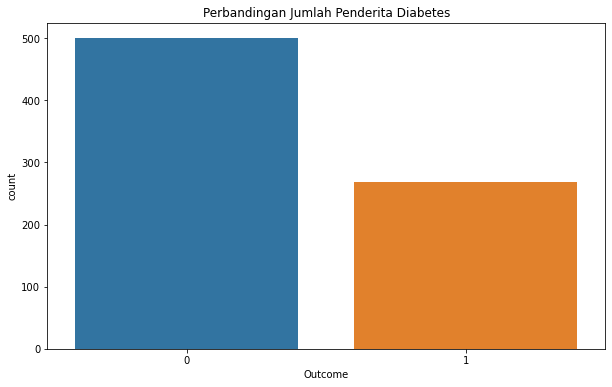

In [4]:
plt.figure(figsize=(10,6))
sns.countplot(x='Outcome',data=dia_df)
plt.title("Perbandingan Jumlah Penderita Diabetes")
plt.show()

### Chi Square Test

In [5]:
# Add a constant
from statsmodels.tools import add_constant as add_constant
dia_df_constant = add_constant(dia_df)
dia_df_constant.head()

,const,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1.0,6,148,72,35,0,33.6,0.627,50,1
1,1.0,1,85,66,29,0,26.6,0.351,31,0
2,1.0,8,183,64,0,0,23.3,0.672,32,1
3,1.0,1,89,66,23,94,28.1,0.167,21,0
4,1.0,0,137,40,35,168,43.1,2.288,33,1


In [6]:
st.chisqprob = lambda chisq, df: st.chi2.sf(chisq, df)
cols=dia_df_constant.columns[:-1]
model=sm.Logit(dia_df.Outcome,dia_df_constant[cols])
result=model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.470993
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      759
Method:                           MLE   Df Model:                            8
Date:                Mon, 25 Oct 2021   Pseudo R-squ.:                  0.2718
Time:                        17:20:49   Log-Likelihood:                -361.72
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 9.652e-54
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -8.4047      0.717    -11.728      0.000      -9.809      -7.000
Pregnancies                  0.1232      0.032      3.840      0.000       0.060       0.186
Glucose                      0.0352      0.004      9.481      0.000       0.028       0.042
BloodPressure               -0.0133      0.005     -2.540      0.011      -0.024      -0.003
SkinThickness                0.0006      0.007      0.090      0.929      -0.013       0.014
Insulin                     -0.0012      0.001     -1.322      0.186      -0.003       0.001
BMI                          0.0897      0.015      5.945      0.000       0.060       0.119
DiabetesPedigreeFunction     0.9452      0.299      3.160      0.002       0.359       1.531
Age                          0.0149      0.009      1.593      0.111      -0.003       0.033
============================================================================================
"""

### Backward Elimination (Eliminate the biggest P-value)

In [7]:
def back_feature_elem (data_frame,dep_var,col_list):
    while len(col_list)>0 :
        model=sm.Logit(dep_var,data_frame[col_list])
        result=model.fit(disp=0)
        largest_pvalue=round(result.pvalues,3).nlargest(1)
        if largest_pvalue[0]<(0.05):
            return result
            break
        else:
            col_list=col_list.drop(largest_pvalue.index)

result=back_feature_elem(dia_df_constant,dia_df.Outcome,cols)

In [8]:
# Result summary
params = np.exp(result.params)
conf = np.exp(result.conf_int())
conf['OR'] = params
pvalue=round(result.pvalues,3)
conf['pvalue']=pvalue
conf.columns = ['CI 95%(2.5%)', 'CI 95%(97.5%)', 'Odds Ratio','pvalue']
print ((conf))

                          CI 95%(2.5%)  CI 95%(97.5%)  Odds Ratio  pvalue
const                         0.000093       0.001320    0.000351   0.000
Pregnancies                   1.103996       1.231273    1.165899   0.000
Glucose                       1.028403       1.042174    1.035265   0.000
BloodPressure                 0.978371       0.997855    0.988065   0.017
BMI                           1.058812       1.119090    1.088534   0.000
DiabetesPedigreeFunction      1.397024       4.423410    2.485882   0.002


In [9]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      762
Method:                           MLE   Df Model:                            5
Date:                Mon, 25 Oct 2021   Pseudo R-squ.:                  0.2667
Time:                        17:20:49   Log-Likelihood:                -364.28
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 3.442e-55
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -7.9550      0.676    -11.771      0.000      -9.280      -6.630
Pregnancies                  0.1535      0.028      5.514      0.000       0.099       0.208
Glucose                      0.0347      0.003     10.213      0.000       0.028       0.041
BloodPressure               -0.0120      0.005     -2.387      0.017      -0.022      -0.002
BMI                          0.0848      0.014      6.006      0.000       0.057       0.113
DiabetesPedigreeFunction     0.9106      0.294      3.097      0.002       0.334       1.487
============================================================================================
"""

### Test Accuracy

In [10]:
import sklearn
new_features=dia_df[['Pregnancies','Glucose','BloodPressure','BMI','DiabetesPedigreeFunction','Outcome']]
x=new_features.iloc[:,:-1] # get all columns without Outcome
y=new_features.iloc[:,-1] # get Outcome
from sklearn.model_selection import train_test_split
# x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=5)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=101)

from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)

In [11]:
# Confusion matrix
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
print(confusion_matrix)

[[133  17]
 [ 31  50]]


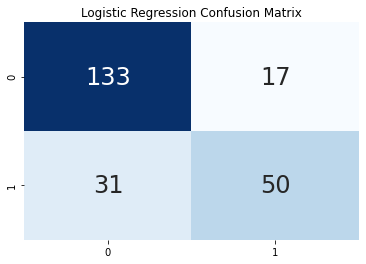

In [12]:
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(confusion_matrix,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})
plt.show()

In [13]:
# Accuracy
sklearn.metrics.accuracy_score(y_test,y_pred)

0.7922077922077922

In [14]:
from sklearn.decomposition import PCA
df2 = dia_df.iloc[:,:-1]
df2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [15]:
df2.drop(df2.index[df2['Insulin'] < 1], inplace = True)
df2.drop(df2.index[df2['Glucose'] < 1], inplace = True)

In [16]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
df_s = df2.copy()
df_s[:] = scaler.fit_transform(df_s[:])
df_s.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
3,-0.714756,-1.092023,-0.372636,-0.584110,-0.521857,-0.680346,-1.026232,-0.965915
4,-1.026520,0.467278,-2.457845,0.559379,0.102157,1.401481,5.034808,0.212067
6,-0.091229,-1.449362,-1.655841,0.273506,-0.572453,-0.277859,-0.794764,-0.475089
8,-0.402992,2.416403,-0.051834,1.512286,3.264391,-0.347254,-1.051951,2.175369
13,-0.714756,2.156520,-0.853838,-0.584110,5.819477,-0.402769,-0.366119,2.764360


In [17]:
# Remove outliers
from sklearn.neighbors import LocalOutlierFactor
from numpy import quantile, where, random

model1 = LocalOutlierFactor(n_neighbors = 20, contamination = 0.1)
y_pred = model1.fit_predict(df2)
outlier_index = where(y_pred == -1) # negative values are outliers and positive values are inliers
# print(outlier_index)

new_df = df2[~df2.index.isin(outlier_index)]
new_df.head()

# abs_z = np.abs(df_s)
# filtered = (abs_z < 3).all(axis = 1)
# new_df = df2[filtered]
# new_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
6,3,78,50,32,88,31.0,0.248,26
8,2,197,70,45,543,30.5,0.158,53
13,1,189,60,23,846,30.1,0.398,59


In [18]:
new_df.info()
new_df.sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 3 to 765
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               393 non-null    int64  
 1   Glucose                   393 non-null    int64  
 2   BloodPressure             393 non-null    int64  
 3   SkinThickness             393 non-null    int64  
 4   Insulin                   393 non-null    int64  
 5   BMI                       393 non-null    float64
 6   DiabetesPedigreeFunction  393 non-null    float64
 7   Age                       393 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 27.6 KB


Pregnancies                  1294.000
Glucose                     48188.000
BloodPressure               27764.000
SkinThickness               11448.000
Insulin                     61263.000
BMI                         12969.800
DiabetesPedigreeFunction      206.765
Age                         12120.000
dtype: float64

In [19]:
new_df.shape

(393, 8)

In [20]:
# Export inlier
new_df.to_csv("./inlier_diabetes.csv")

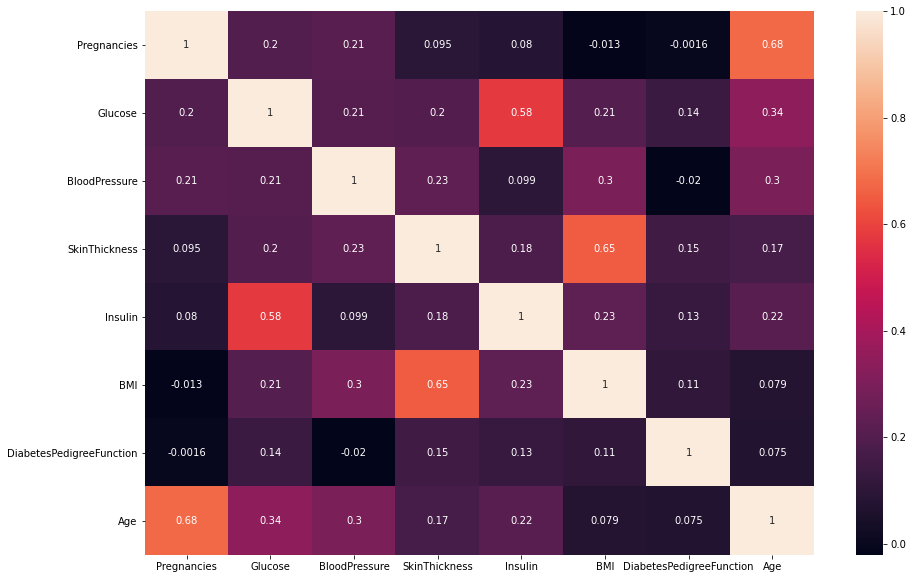

In [21]:
plt.figure(figsize=(15,10))
corrMatrix = new_df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

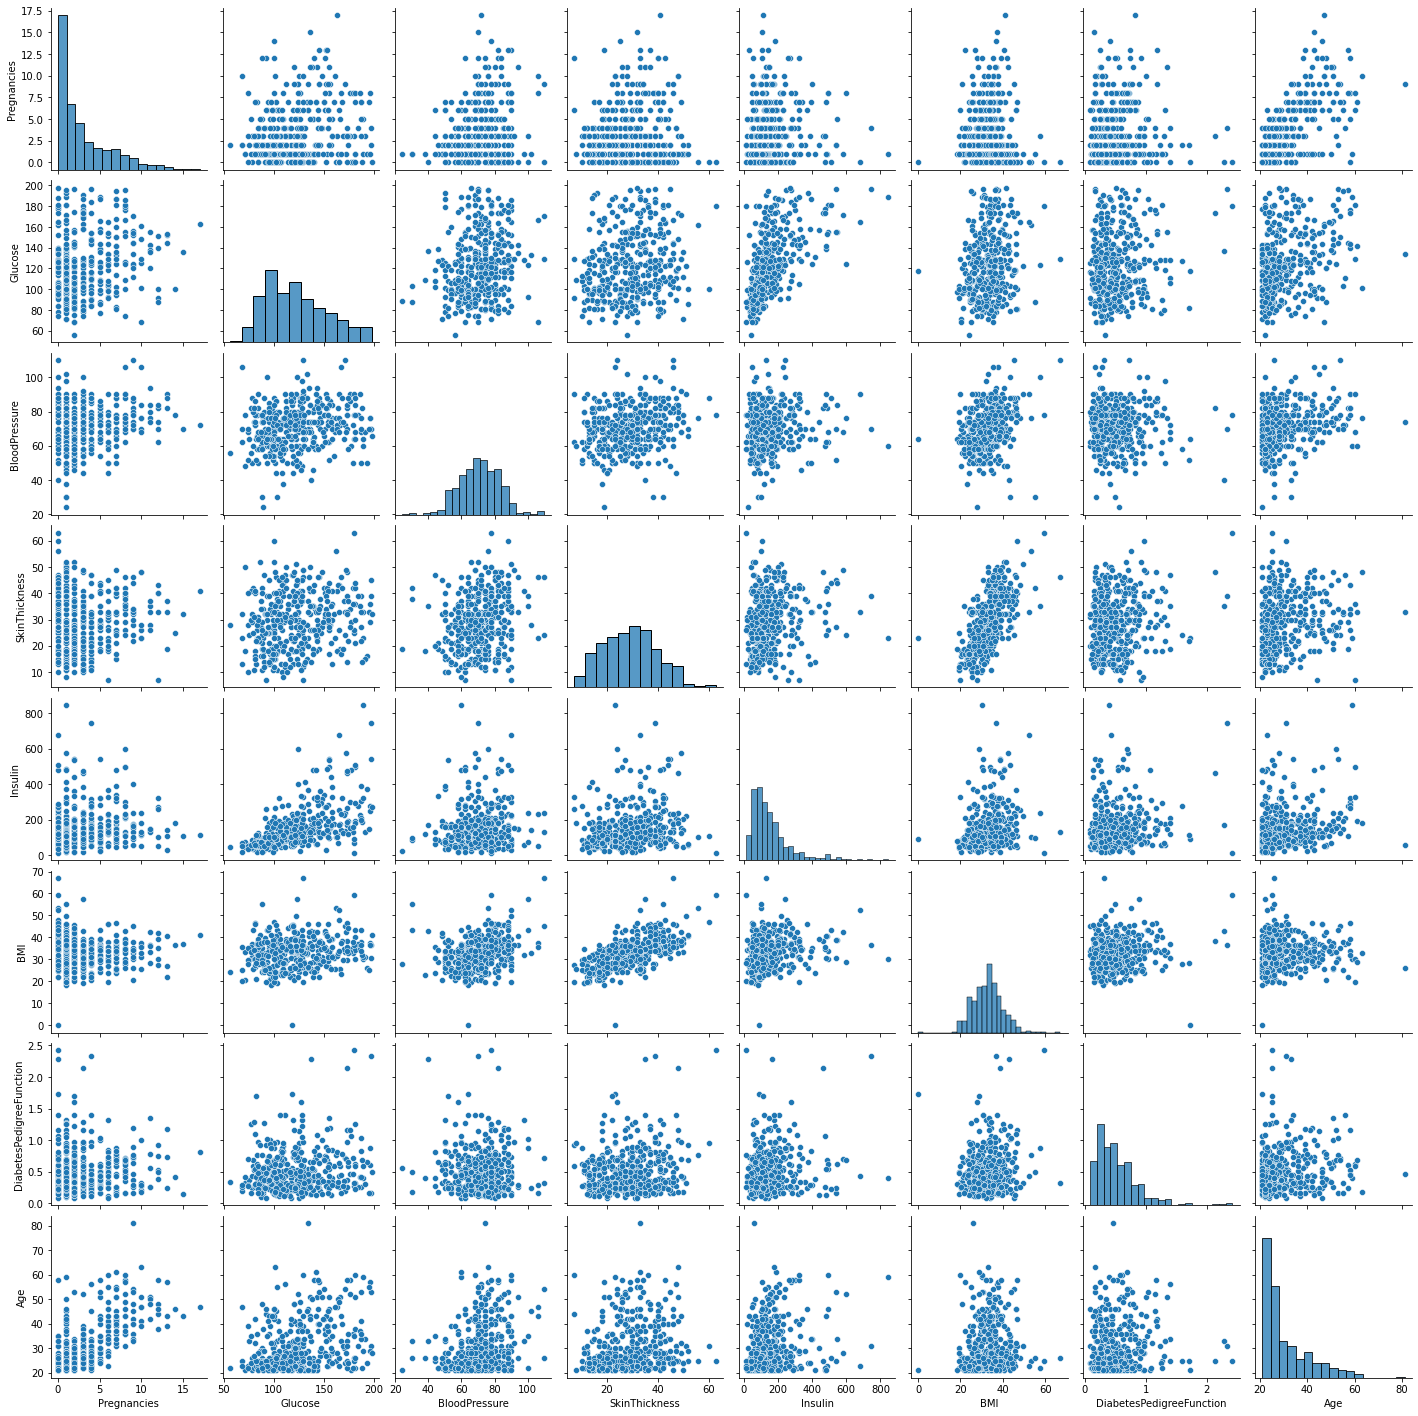

In [22]:
num_col = new_df.columns
ax = sns.pairplot(new_df[num_col])

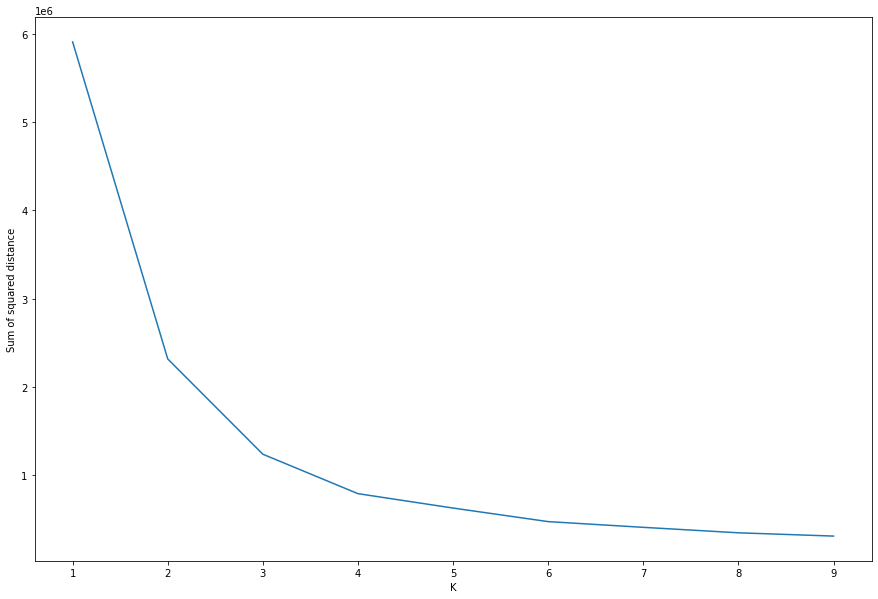

In [23]:
from sklearn.cluster import KMeans
pca = PCA(n_components=2)
pcaComponents = pca.fit_transform(new_df)

kmeans_models = [KMeans(n_clusters=k, random_state=100).fit(pcaComponents) for k in range(1, 10)]
innertia = [model.inertia_ for model in kmeans_models]

plt.figure(figsize=(15,10))
plt.plot(range(1, 10), innertia)
plt.xlabel("K")
plt.ylabel("Sum of squared distance")
plt.show()

In [24]:
principalDF = pd.DataFrame(data = pcaComponents, columns=["Component 1", "Component 2"])
principalDF.head()

,Component 1,Component 2
0,-66.757371,-25.237298
1,14.133522,8.872303
2,-74.283985,-35.616113
3,394.434448,14.313421
4,691.965686,-43.424591


In [25]:
kmean = KMeans(3)
kmean.fit(new_df)
labels = kmean.labels_

In [26]:
new_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
6,3,78,50,32,88,31.0,0.248,26
8,2,197,70,45,543,30.5,0.158,53
13,1,189,60,23,846,30.1,0.398,59


In [27]:
clusters = pd.concat([new_df, pd.DataFrame({'cluster': labels})], axis=1)
clusters.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,cluster
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,2.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,2.0


In [28]:
principalDF = pd.DataFrame(data = pcaComponents, columns=["Component 1", "Component 2"])

clusterDF = pd.concat([principalDF, pd.DataFrame({'cluster': labels})], axis = 1)
clusterDF.head()

,Component 1,Component 2,cluster
0,-66.757371,-25.237298,1
1,14.133522,8.872303,0
2,-74.283985,-35.616113,1
3,394.434448,14.313421,2
4,691.965686,-43.424591,2


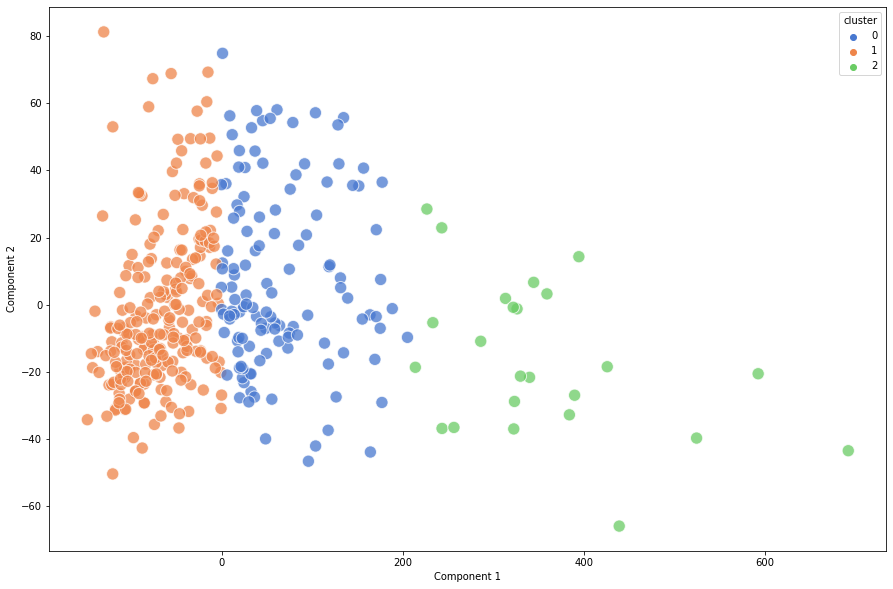

In [29]:
plt.figure(figsize=(15,10))
ax = sns.scatterplot(x="Component 1", y="Component 2", hue="cluster", data=clusterDF, sizes=(40, 400), alpha=.75, palette="muted", s=150)
plt.show()

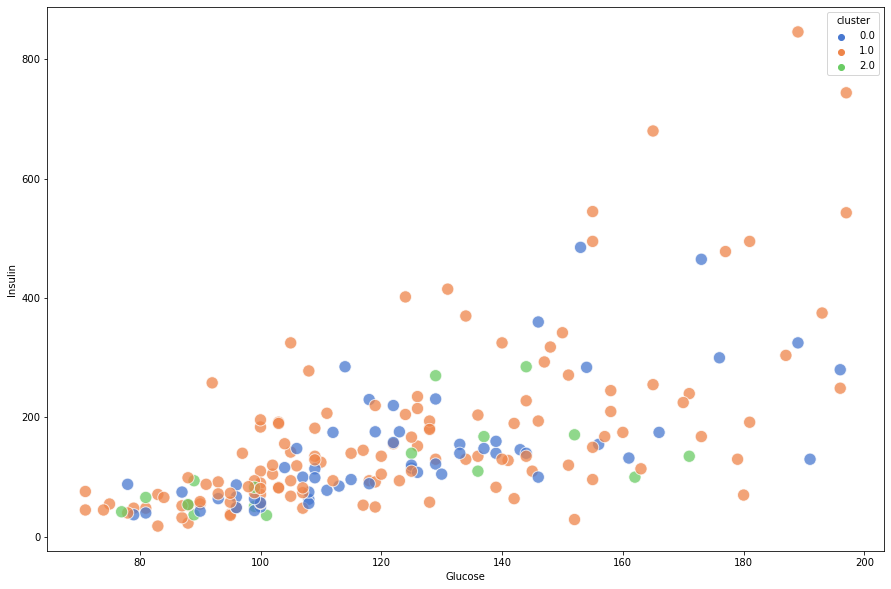

In [30]:
plt.figure(figsize=(15,10))
ax = sns.scatterplot(x="Glucose", y="Insulin", hue="cluster", data=clusters, sizes=(40, 400), alpha=.75, palette="muted", s=150)
plt.show()